In [29]:
import h5py

def get_dataset_from_root(hdf5_file, dataset_name):

    with h5py.File(hdf5_file, 'r') as file:
        dataset = file[dataset_name][:]
    return dataset

import numpy as np
import matplotlib.pyplot as plt

In [51]:
# Example usage
hdf5_ANZ1_file = 'POP_NEW_LME_AMZ1_op1_random_trn4_tst10_2024-Mar-14_at_20-28.h5'

F_min_ANZ1 = get_dataset_from_root(hdf5_ANZ1_file, "F_min")
F_median_ANZ1 = get_dataset_from_root(hdf5_ANZ1_file, "F_median")
F_mean_ANZ1 = get_dataset_from_root(hdf5_ANZ1_file, "F_mean")
Omegas_ANZ1 = get_dataset_from_root(hdf5_ANZ1_file, "Omegas")

hdf5_ANZ3_file = 'POP_NEW_LME_AMZ3_op5_random_trn4_tst10_2024-Mar-14_at_23-56.h5'

F_min_ANZ3 = get_dataset_from_root(hdf5_ANZ3_file, "F_min")
F_median_ANZ3 = get_dataset_from_root(hdf5_ANZ3_file, "F_median")
F_mean_ANZ3 = get_dataset_from_root(hdf5_ANZ3_file, "F_mean")
Omegas_ANZ3 = get_dataset_from_root(hdf5_ANZ3_file, "Omegas")


hdf5_GEN1_file = 'POP_NEW_LME_GEN_op1_random_trn4_tst10_2024-Mar-14_at_21-47.h5'

F_min_GEN1 = get_dataset_from_root(hdf5_GEN1_file, "F_min")
F_median_GEN1 = get_dataset_from_root(hdf5_GEN1_file, "F_median")
F_mean_GEN1 = get_dataset_from_root(hdf5_GEN1_file, "F_mean")
Omegas_GEN1 = get_dataset_from_root(hdf5_GEN1_file, "Omegas")

hdf5_GEN2_file = 'POP_NEW_LME_GEN_op2_random_trn4_tst10_2024-Mar-14_at_22-05.h5'

F_min_GEN2 = get_dataset_from_root(hdf5_GEN2_file, "F_min")
F_median_GEN2 = get_dataset_from_root(hdf5_GEN2_file, "F_median")
F_mean_GEN2 = get_dataset_from_root(hdf5_GEN2_file, "F_mean")
Omegas_GEN2 = get_dataset_from_root(hdf5_GEN2_file, "Omegas")

hdf5_GEN_ADR_file = 'POP_NEW_LME_GEN_ADR_op1_random_trn4_tst10_2024-Mar-15_at_12-49.h5'

F_min_GEN_ADR = get_dataset_from_root(hdf5_GEN_ADR_file, "F_min")
F_median_GEN_ADR = get_dataset_from_root(hdf5_GEN_ADR_file, "F_median")
F_mean_GEN_ADR = get_dataset_from_root(hdf5_GEN_ADR_file, "F_mean")
Omegas_GEN_ADR = get_dataset_from_root(hdf5_GEN_ADR_file, "Omegas")


N = get_dataset_from_root("NonMarkovianityB4D10.h5", "Nworst")


F_best_median = np.array([max(a, b) for a, b in zip(F_median_ANZ3, F_median_GEN_ADR)])
F_best_median = np.array([max(a, b) for a, b in zip(F_best_median, F_mean_GEN1)])

F_best_min = np.array([max(a, b) for a, b in zip(F_min_ANZ3, F_min_GEN_ADR)])
F_best_min = np.array([max(a, b) for a, b in zip(F_best_min, F_min_GEN1)])

F_best_median

array([0.99963745, 0.99999885, 0.99999346, 0.99995361, 0.99969945,
       0.99724026, 0.99923299, 0.99970798])

In [38]:
#γ = [ "0.079477",  "0.25133", "0.79477", "2.5133", "7.9477", "25.133", "79.477", "251.33"]
γ = [ "0.0795",  "0.2513", "0.7948", "2.5133", "7.9477", "25.133", "79.477", "251.33"]
gammas = [float(g) for g in γ]

Text(0, 0.5, 'Breuer Non-Markovianity Measure')

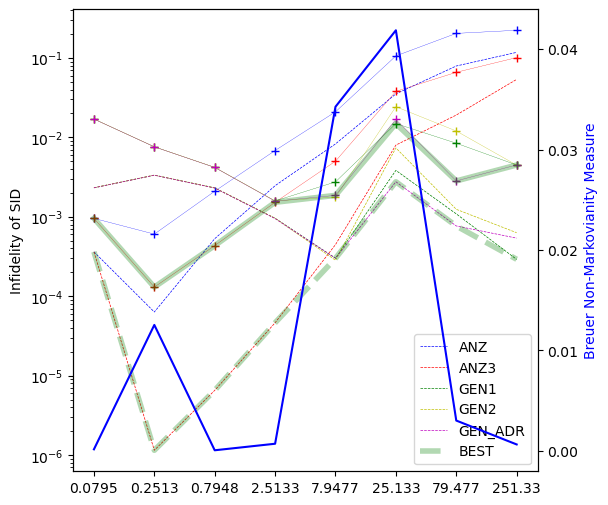

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.semilogy(1-F_median_ANZ1,"--b", linewidth=0.5, label="ANZ")
ax.semilogy(1-F_min_ANZ1, "+-b", linewidth=0.2)

ax.semilogy(1-F_median_ANZ3,"--r", linewidth=0.5, label="ANZ3")
ax.semilogy(1-F_min_ANZ3, "+-r", linewidth=0.2)

ax.semilogy(1-F_median_GEN1,"--g", linewidth=0.5, label="GEN1")
ax.semilogy(1-F_min_GEN1, "+-g", linewidth=0.2)

ax.semilogy(1-F_median_GEN2,"--y", linewidth=0.5, label="GEN2")
ax.semilogy(1-F_min_GEN2, "+-y", linewidth=0.2)

ax.semilogy(1-F_median_GEN_ADR,"--m", linewidth=0.5, label="GEN_ADR")
ax.semilogy(1-F_min_GEN_ADR, "+-m", linewidth=0.2)

ax.semilogy(1-F_best_median,"g--", linewidth=4, alpha=0.3, label="BEST")
ax.semilogy(1-F_best_min,"g+-", linewidth=4, alpha=0.3)

ax.set_ylabel('Infidelity of SID')

ax.legend()

ymin = -5
ymax = -0.9

#tick_range = np.arange(ymin, ymax)
#ax.yaxis.set_ticks(tick_range, [ r'$10^{-5}$', r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$'], minor=True)
#ax.yaxis.set_ticks([np.log10(x) for p in np.arange(-5, -1) for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

ax.xaxis.set_ticks(range(8), γ )


ax2 = ax.twinx()
ax2.plot(N, 'b-')
ax2.set_ylabel('Breuer Non-Markovianity Measure', color='b')

In [53]:
fig.savefig("LogInfidelity_ANZvsGEN_and_NonMarkovianity.pdf")